In [16]:
import pandas as pd

data = pd.read_csv("../pm2_data.csv")

data.head()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,0,Bishkek,PM2.5 - Principal,2019-02-06 06:00:00,2019,2,6,6,-999.0,-999,NaN,12.0,UG/M3,1 Hr,Valid
1,1,Bishkek,PM2.5 - Principal,2019-02-06 07:00:00,2019,2,6,7,17.0,61,Moderate,20.0,UG/M3,1 Hr,Valid
2,2,Bishkek,PM2.5 - Principal,2019-02-06 08:00:00,2019,2,6,8,19.1,66,Moderate,21.0,UG/M3,1 Hr,Valid
3,3,Bishkek,PM2.5 - Principal,2019-02-06 09:00:00,2019,2,6,9,22.4,73,Moderate,25.0,UG/M3,1 Hr,Valid
4,4,Bishkek,PM2.5 - Principal,2019-02-06 10:00:00,2019,2,6,10,30.9,91,Moderate,39.0,UG/M3,1 Hr,Valid


In [17]:
data.isnull().sum()

Unnamed: 0         0
Site               0
Parameter          0
Date (LT)          0
Year               0
Month              0
Day                0
Hour               0
NowCast Conc.      0
AQI                0
AQI Category     202
Raw Conc.          0
Conc. Unit         0
Duration           0
QC Name            0
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data['QC Name'].unique()

array(['Valid', 'Invalid', 'Missing', 'Suspect'], dtype=object)

In [20]:
data.drop('Unnamed: 0',axis=1, inplace=True)
data.drop('Site',axis=1, inplace=True)
data.drop('Parameter',axis=1, inplace=True)
data.drop('Date (LT)',axis=1, inplace=True)
data.drop('Conc. Unit',axis=1, inplace=True)
data.drop('Duration',axis=1, inplace=True)


In [21]:
data.drop('AQI',axis=1, inplace=True)

In [22]:
data.drop('QC Name',axis=1, inplace=True)

In [23]:
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,Moderate,20.0
2,2019,2,6,8,19.1,Moderate,21.0
3,2019,2,6,9,22.4,Moderate,25.0
4,2019,2,6,10,30.9,Moderate,39.0
5,2019,2,6,11,35.0,Moderate,39.0


In [24]:
data['AQI Category'].unique()

array(['Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous', 'Good'], dtype=object)

In [25]:
# Hot encoding
# importing sklearn one hot encoding
from sklearn.preprocessing import OneHotEncoder
# initializing one hot encoding
encoding = OneHotEncoder()


In [26]:
# applying one hot encoding in python
#transformed_data = encoding.fit_transform(data[['QC Name']])

In [27]:
# Getting one hot encoded categories
#print(encoding.categories_)

In [28]:
# adding the encoded values
#data[encoding.categories_[0]] = transformed_data.toarray()

# deleting the uncoded one
#data.drop('QC Name', axis=1, inplace=True)

# data heading
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,Moderate,20.0
2,2019,2,6,8,19.1,Moderate,21.0
3,2019,2,6,9,22.4,Moderate,25.0
4,2019,2,6,10,30.9,Moderate,39.0
5,2019,2,6,11,35.0,Moderate,39.0


In [30]:
# Import sklearn labelencoder
from sklearn import preprocessing
  
# initializing sklearn labelencoder
label_encoder = preprocessing.LabelEncoder()
  
# encoding marrige column
data['AQI Category']= label_encoder.fit_transform(data['AQI Category'])


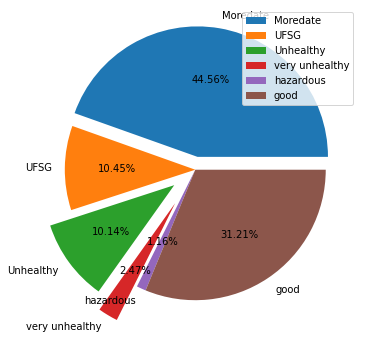

In [29]:
# importing numpy
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = ( 15, 6))

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# creating variables
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i =="Moderate":
        one+=1
    elif i =='Unhealthy for Sensitive Groups':
        two+=1
    elif i == 'Unhealthy':
        three+=1
    elif i == 'Very Unhealthy':
        four+=1
    elif i == 'Hazardous':
        five+=1
    elif i == 'Good':
        six+=1
# creating numpy arry
labels = ['Moredate', 'UFSG', 'Unhealthy', 'very unhealthy', 'hazardous', 'good']

values = np.array([one, two, three, four, five, six])
plt.pie(values, labels = labels, autopct='%1.2f%%', explode = explode,)
plt.legend()
plt.show()

In [43]:
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i ==0:
        one+=1
    elif i ==1:
        two+=1
    elif i == 2:
        three+=1
    elif i == 3:
        four+=1
    elif i == 4:
        five+=1
    elif i == 5:
        six+=1

In [44]:
print(one)
print(two)
print(three)
print(four)
print(five)
print(six)

10400
387
14846
3380
3482
823


In [31]:
# splitting the dataset into input and output
Input = data.drop('AQI Category', axis=1)

Output =data['AQI Category']

In [32]:
from sklearn.model_selection import train_test_split


# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30, random_state=40)

In [33]:
X_train.shape

(23322, 6)

In [34]:
# importing the CatBoot classifier
from catboost import CatBoostClassifier

# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()

# training the catboost classifier model
CatBoost_clf.fit(X_train, y_train)

Learning rate set to 0.092914
0:	learn: 1.3798804	total: 63.9ms	remaining: 1m 3s
1:	learn: 1.1343581	total: 76.8ms	remaining: 38.3s
2:	learn: 0.9582650	total: 87.9ms	remaining: 29.2s
3:	learn: 0.8214019	total: 95.9ms	remaining: 23.9s
4:	learn: 0.7133539	total: 103ms	remaining: 20.5s
5:	learn: 0.6301497	total: 111ms	remaining: 18.4s
6:	learn: 0.5573975	total: 118ms	remaining: 16.7s
7:	learn: 0.4942551	total: 125ms	remaining: 15.5s
8:	learn: 0.4401321	total: 132ms	remaining: 14.5s
9:	learn: 0.3947259	total: 140ms	remaining: 13.8s
10:	learn: 0.3555105	total: 147ms	remaining: 13.2s
11:	learn: 0.3199389	total: 154ms	remaining: 12.7s
12:	learn: 0.2892066	total: 162ms	remaining: 12.3s
13:	learn: 0.2621216	total: 170ms	remaining: 11.9s
14:	learn: 0.2373519	total: 177ms	remaining: 11.6s
15:	learn: 0.2151767	total: 184ms	remaining: 11.3s
16:	learn: 0.1959422	total: 192ms	remaining: 11.1s
17:	learn: 0.1787688	total: 201ms	remaining: 11s
18:	learn: 0.1633222	total: 210ms	remaining: 10.8s
19:	learn

176:	learn: 0.0095595	total: 1.62s	remaining: 7.55s
177:	learn: 0.0095177	total: 1.63s	remaining: 7.54s
178:	learn: 0.0094895	total: 1.64s	remaining: 7.53s
179:	learn: 0.0094668	total: 1.65s	remaining: 7.52s
180:	learn: 0.0094428	total: 1.66s	remaining: 7.5s
181:	learn: 0.0094258	total: 1.67s	remaining: 7.49s
182:	learn: 0.0094047	total: 1.67s	remaining: 7.47s
183:	learn: 0.0093737	total: 1.68s	remaining: 7.45s
184:	learn: 0.0093615	total: 1.69s	remaining: 7.43s
185:	learn: 0.0093507	total: 1.69s	remaining: 7.41s
186:	learn: 0.0093408	total: 1.7s	remaining: 7.39s
187:	learn: 0.0093308	total: 1.71s	remaining: 7.38s
188:	learn: 0.0093176	total: 1.72s	remaining: 7.36s
189:	learn: 0.0092893	total: 1.72s	remaining: 7.35s
190:	learn: 0.0092527	total: 1.73s	remaining: 7.33s
191:	learn: 0.0092079	total: 1.74s	remaining: 7.31s
192:	learn: 0.0091804	total: 1.75s	remaining: 7.3s
193:	learn: 0.0091511	total: 1.75s	remaining: 7.28s
194:	learn: 0.0091196	total: 1.76s	remaining: 7.27s
195:	learn: 0.0

357:	learn: 0.0064526	total: 3.02s	remaining: 5.42s
358:	learn: 0.0064213	total: 3.03s	remaining: 5.42s
359:	learn: 0.0064170	total: 3.04s	remaining: 5.41s
360:	learn: 0.0064121	total: 3.05s	remaining: 5.4s
361:	learn: 0.0063925	total: 3.06s	remaining: 5.4s
362:	learn: 0.0063741	total: 3.07s	remaining: 5.39s
363:	learn: 0.0063679	total: 3.08s	remaining: 5.38s
364:	learn: 0.0063623	total: 3.09s	remaining: 5.37s
365:	learn: 0.0063586	total: 3.1s	remaining: 5.36s
366:	learn: 0.0063545	total: 3.1s	remaining: 5.35s
367:	learn: 0.0063175	total: 3.11s	remaining: 5.34s
368:	learn: 0.0063110	total: 3.12s	remaining: 5.33s
369:	learn: 0.0063055	total: 3.13s	remaining: 5.32s
370:	learn: 0.0062991	total: 3.13s	remaining: 5.31s
371:	learn: 0.0062955	total: 3.14s	remaining: 5.3s
372:	learn: 0.0062913	total: 3.15s	remaining: 5.29s
373:	learn: 0.0062889	total: 3.15s	remaining: 5.28s
374:	learn: 0.0062854	total: 3.16s	remaining: 5.27s
375:	learn: 0.0062764	total: 3.17s	remaining: 5.26s
376:	learn: 0.006

538:	learn: 0.0048384	total: 4.44s	remaining: 3.79s
539:	learn: 0.0048364	total: 4.45s	remaining: 3.79s
540:	learn: 0.0048325	total: 4.46s	remaining: 3.78s
541:	learn: 0.0048293	total: 4.46s	remaining: 3.77s
542:	learn: 0.0048189	total: 4.47s	remaining: 3.76s
543:	learn: 0.0048097	total: 4.48s	remaining: 3.75s
544:	learn: 0.0048017	total: 4.49s	remaining: 3.75s
545:	learn: 0.0047959	total: 4.49s	remaining: 3.74s
546:	learn: 0.0047926	total: 4.5s	remaining: 3.73s
547:	learn: 0.0047754	total: 4.51s	remaining: 3.72s
548:	learn: 0.0047677	total: 4.52s	remaining: 3.71s
549:	learn: 0.0047623	total: 4.52s	remaining: 3.7s
550:	learn: 0.0047513	total: 4.53s	remaining: 3.69s
551:	learn: 0.0047425	total: 4.54s	remaining: 3.68s
552:	learn: 0.0047343	total: 4.55s	remaining: 3.68s
553:	learn: 0.0047322	total: 4.55s	remaining: 3.67s
554:	learn: 0.0047225	total: 4.56s	remaining: 3.66s
555:	learn: 0.0047135	total: 4.57s	remaining: 3.65s
556:	learn: 0.0047122	total: 4.58s	remaining: 3.64s
557:	learn: 0.

719:	learn: 0.0037875	total: 5.85s	remaining: 2.27s
720:	learn: 0.0037836	total: 5.86s	remaining: 2.27s
721:	learn: 0.0037796	total: 5.87s	remaining: 2.26s
722:	learn: 0.0037771	total: 5.88s	remaining: 2.25s
723:	learn: 0.0037740	total: 5.89s	remaining: 2.24s
724:	learn: 0.0037713	total: 5.89s	remaining: 2.23s
725:	learn: 0.0037680	total: 5.9s	remaining: 2.23s
726:	learn: 0.0037641	total: 5.91s	remaining: 2.22s
727:	learn: 0.0037570	total: 5.92s	remaining: 2.21s
728:	learn: 0.0037553	total: 5.92s	remaining: 2.2s
729:	learn: 0.0037522	total: 5.93s	remaining: 2.19s
730:	learn: 0.0037503	total: 5.94s	remaining: 2.19s
731:	learn: 0.0037440	total: 5.95s	remaining: 2.18s
732:	learn: 0.0037372	total: 5.95s	remaining: 2.17s
733:	learn: 0.0037326	total: 5.96s	remaining: 2.16s
734:	learn: 0.0037314	total: 5.97s	remaining: 2.15s
735:	learn: 0.0037250	total: 5.97s	remaining: 2.14s
736:	learn: 0.0037188	total: 5.98s	remaining: 2.13s
737:	learn: 0.0037118	total: 5.99s	remaining: 2.13s
738:	learn: 0.

896:	learn: 0.0030811	total: 7.26s	remaining: 834ms
897:	learn: 0.0030754	total: 7.27s	remaining: 826ms
898:	learn: 0.0030737	total: 7.28s	remaining: 818ms
899:	learn: 0.0030669	total: 7.29s	remaining: 810ms
900:	learn: 0.0030632	total: 7.3s	remaining: 803ms
901:	learn: 0.0030622	total: 7.31s	remaining: 795ms
902:	learn: 0.0030580	total: 7.32s	remaining: 787ms
903:	learn: 0.0030482	total: 7.33s	remaining: 779ms
904:	learn: 0.0030471	total: 7.34s	remaining: 770ms
905:	learn: 0.0030423	total: 7.35s	remaining: 762ms
906:	learn: 0.0030390	total: 7.36s	remaining: 754ms
907:	learn: 0.0030373	total: 7.36s	remaining: 746ms
908:	learn: 0.0030354	total: 7.37s	remaining: 738ms
909:	learn: 0.0030339	total: 7.38s	remaining: 730ms
910:	learn: 0.0030299	total: 7.38s	remaining: 721ms
911:	learn: 0.0030289	total: 7.39s	remaining: 713ms
912:	learn: 0.0030246	total: 7.4s	remaining: 705ms
913:	learn: 0.0030197	total: 7.41s	remaining: 697ms
914:	learn: 0.0030128	total: 7.42s	remaining: 689ms
915:	learn: 0.

In [35]:
# making predictions
catboost_pred = CatBoost_clf.predict(X_test)

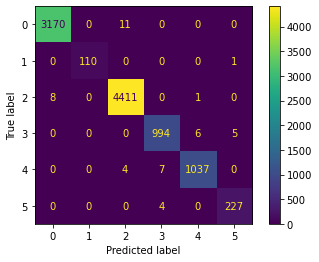

In [51]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <a href="https://techfor-today.com/sklearn-confusion-matrix-in-machine-learning/">confusion matrix</a> plotting
cm = confusion_matrix(y_test, catboost_pred, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [52]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, catboost_pred))

The accuracy is:  0.9952981192476991


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, catboost_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      0.99      1.00       111
           2       1.00      1.00      1.00      4420
           3       0.99      0.99      0.99      1005
           4       0.99      0.99      0.99      1048
           5       0.97      0.98      0.98       231

    accuracy                           1.00      9996
   macro avg       0.99      0.99      0.99      9996
weighted avg       1.00      1.00      1.00      9996



In [54]:
catboost_pred_train = CatBoost_clf.predict(X_train)

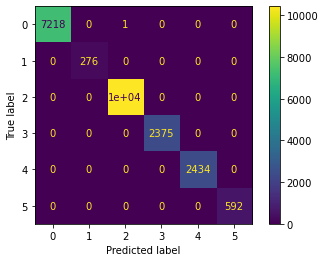

In [55]:
cm = confusion_matrix(y_train, catboost_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [56]:
# printing
print("The accuracy is: ", accuracy_score(y_train, catboost_pred_train))

The accuracy is:  0.9999571220307006


In [57]:
print(classification_report(y_train, catboost_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7219
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00     10426
           3       1.00      1.00      1.00      2375
           4       1.00      1.00      1.00      2434
           5       1.00      1.00      1.00       592

    accuracy                           1.00     23322
   macro avg       1.00      1.00      1.00     23322
weighted avg       1.00      1.00      1.00     23322



In [58]:
# importing the lightgbm module
import lightgbm as lgb

# initializing the model
model_Clf = lgb.LGBMClassifier()

# training the model
model_Clf.fit(X_train, y_train)

LGBMClassifier()

In [59]:
# making prediction 
clf_pred = model_Clf.predict(X_test)
clf_pred_train= model_Clf.predict(X_train)

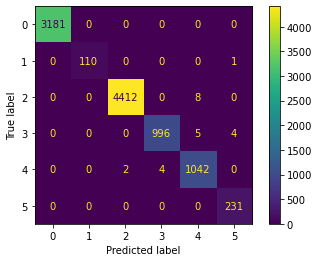

In [60]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, clf_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [61]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, clf_pred))

The accuracy is:  0.9975990396158463


In [62]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      0.99      1.00       111
           2       1.00      1.00      1.00      4420
           3       1.00      0.99      0.99      1005
           4       0.99      0.99      0.99      1048
           5       0.98      1.00      0.99       231

    accuracy                           1.00      9996
   macro avg       0.99      1.00      0.99      9996
weighted avg       1.00      1.00      1.00      9996



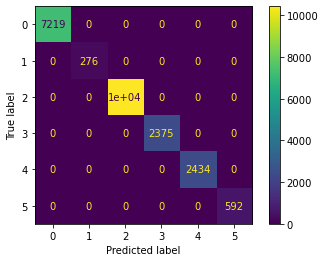

In [63]:
cm = confusion_matrix(y_train, clf_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [64]:
print("The accuracy is: ", accuracy_score(y_train, clf_pred_train))
print(classification_report(y_train, clf_pred_train))

The accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7219
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00     10426
           3       1.00      1.00      1.00      2375
           4       1.00      1.00      1.00      2434
           5       1.00      1.00      1.00       592

    accuracy                           1.00     23322
   macro avg       1.00      1.00      1.00     23322
weighted avg       1.00      1.00      1.00     23322



In [50]:
# importing sklearn knn classifier
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=5 )

In [157]:
# model training
classifer.fit(X_train,y_train)

KNeighborsClassifier()

In [158]:
# making predictions
y_pred = classifer.predict(X_test)

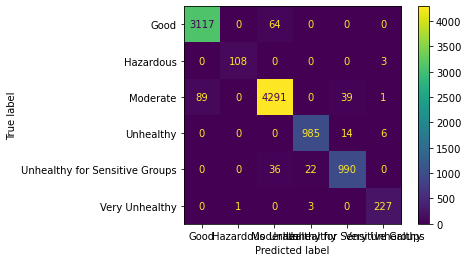

In [159]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, y_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [160]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy 
accuracy_score(y_test,y_pred) 

0.97218887555022

In [161]:
print(classification_report(y_test, y_pred))

                                precision    recall  f1-score   support

                          Good       0.97      0.98      0.98      3181
                     Hazardous       0.99      0.97      0.98       111
                      Moderate       0.98      0.97      0.97      4420
                     Unhealthy       0.98      0.98      0.98      1005
Unhealthy for Sensitive Groups       0.95      0.94      0.95      1048
                Very Unhealthy       0.96      0.98      0.97       231

                      accuracy                           0.97      9996
                     macro avg       0.97      0.97      0.97      9996
                  weighted avg       0.97      0.97      0.97      9996



In [170]:
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,Moderate,20.0
2,2019,2,6,8,19.1,Moderate,21.0
3,2019,2,6,9,22.4,Moderate,25.0
4,2019,2,6,10,30.9,Moderate,39.0
5,2019,2,6,11,35.0,Moderate,39.0


In [195]:
# importing required module for Neural Networks for Classification using TensorFlow
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential

In [196]:
# defineNeural Networks for Classification using TensorFlow model
model = Sequential()
# adding input layer with 16 nodes
model.add(InputLayer(6))
# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

In [197]:
# adding output layer 
model.add(Dense(6, activation='softmax'))

In [198]:
# compile the Neural Networks for Classification using TensorFlow model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
729/729 [==============================] - 2s 2ms/step - loss: 526.0876 - accuracy: 0.3186
Epoch 2/50
729/729 [==============================] - 1s 2ms/step - loss: 3.6266 - accuracy: 0.7104
Epoch 3/50
729/729 [==============================] - 1s 2ms/step - loss: 2.0820 - accuracy: 0.8239
Epoch 4/50
729/729 [==============================] - 1s 2ms/step - loss: 1.6742 - accuracy: 0.8436
Epoch 5/50
729/729 [==============================] - 2s 2ms/step - loss: 1.3785 - accuracy: 0.8564
Epoch 6/50
729/729 [==============================] - 1s 2ms/step - loss: 1.0989 - accuracy: 0.8706
Epoch 7/50
729/729 [==============================] - 2s 2ms/step - loss: 0.9099 - accuracy: 0.8695
Epoch 8/50
729/729 [==============================] - 1s 2ms/step - loss: 0.7967 - accuracy: 0.8671
Epoch 9/50
729/729 [==============================] - 1s 2ms/step - loss: 0.6601 - accuracy: 0.8721
Epoch 10/50
729/729 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.88

In [199]:
# evaluate Neural Networks for Classification using TensorFlow
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9688
Test Accuracy: 0.9687874913215637


In [ ]:
print(classification_report(y_test, y_pred))